# Predict Health Outcome of Cardiovascular Disease with Tree Models

### Decision Tree, Random Forest, XGBoost(Booseted Tree Ensemble)

#### Datatset
- This dataset is obtained from Kaggle: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

#### Context
- Cardiovascular disease (CVDs) is the number one cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs.
- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management.  
- This dataset contains 11 features that can be used to predict possible heart disease.
- Let's train a machine learning model to assist with diagnosing this disease.

#### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
!pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=bee6f11b46df0cf48bbb9288623877dbc7ba1008acfe5569058d96a1b2bc9016
  Stored in directory: /Users/mayazwang/Library/Caches/pip/wheels/fb/01/d5/daa97ea9d89ceec9c6c76fad6fe97165661fd2236c46f83354
Successfully built kaggle


In [3]:
import opendatasets as od
# download the dataset (this is a Kaggle dataset)
# during download you will be required to input your Kaggle username and password
od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  mayazhew


Your Kaggle Key:

  ········


100%|██████████| 8.56k/8.56k [00:00<00:00, 6.18MB/s]

In [165]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [38]:
# Load the dataset using pandas
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [39]:
# double ckeck for missing data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
# ckeck for data type
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [41]:
# idenfity the categorical vars
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

In [42]:
# one hot encoding / creating dummy vars
df = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


- The target is `HeartDisease`.
- All other variables are features that can potentially be used to predict the target, `HeartDisease`.

In [43]:
features = [x for x in df.columns if x not in 'HeartDisease'] ## Removing our target variable
# get a list of feature names
print(features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [44]:
# set random_state for replicable results
RANDOM_STATE = 55 

# split data into traininga and testing sets
X_train, X_val, y_train, y_val = train_test_split(df[features], df['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)

print(f'train samples: {len(X_train)}\ntest samples: {len(X_val)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 734
test samples: 184
target proportion: 0.5518


## Decision Tree

##### Hyperparameters:

min_samples_split: The minimum number of samples required to split an internal node.
 - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.

max_depth: The maximum depth of the tree.
 - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

will not perform feature selection nor hyperparameter tuning in this lab 

In [45]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

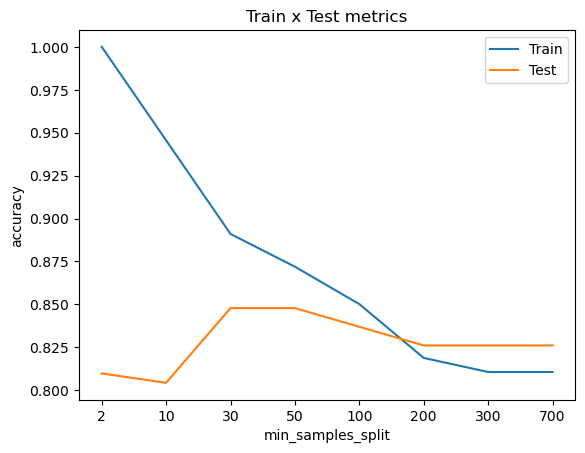

In [48]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

#### Insight:
Increasing min_samples_split from 10 to 30, and from 30 to 50 improves the validation accuracy (while bringing the training accuracy closer to the validation accuracy).

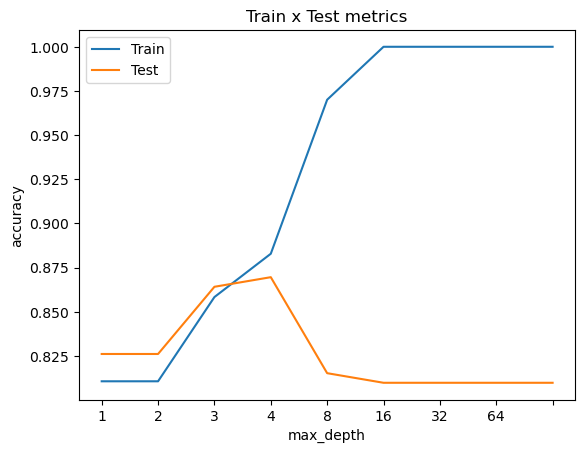

In [49]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

##### Insight:
Reducing `max_depth` can help to reduce overfitting.

- Reducing `max_depth` from 8 to 4 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
- The validation accuracy reaches the highest at tree_depth=4. 
- When the `max_depth` is smaller than 3, both training and validation accuracy decreases.  The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set). 
- When the `max_depth` is too high ( >= 5), validation accuracy decreases while training accuracy increases, indicating that the model is overfitting to the training set.

So we can choose the best values for these two hyper-parameters for our model to be:
- `max_depth = 3`
- `min_samples_split = 50` 

In [56]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [57]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.8583
Metrics test:
	Accuracy score: 0.8641


In [80]:
# HD_levels = list(df['HeartDisease'].value_counts().index)
HD_levels = ['HeatDis', 'NoHeartDis']

In [73]:
import sklearn.tree as tree

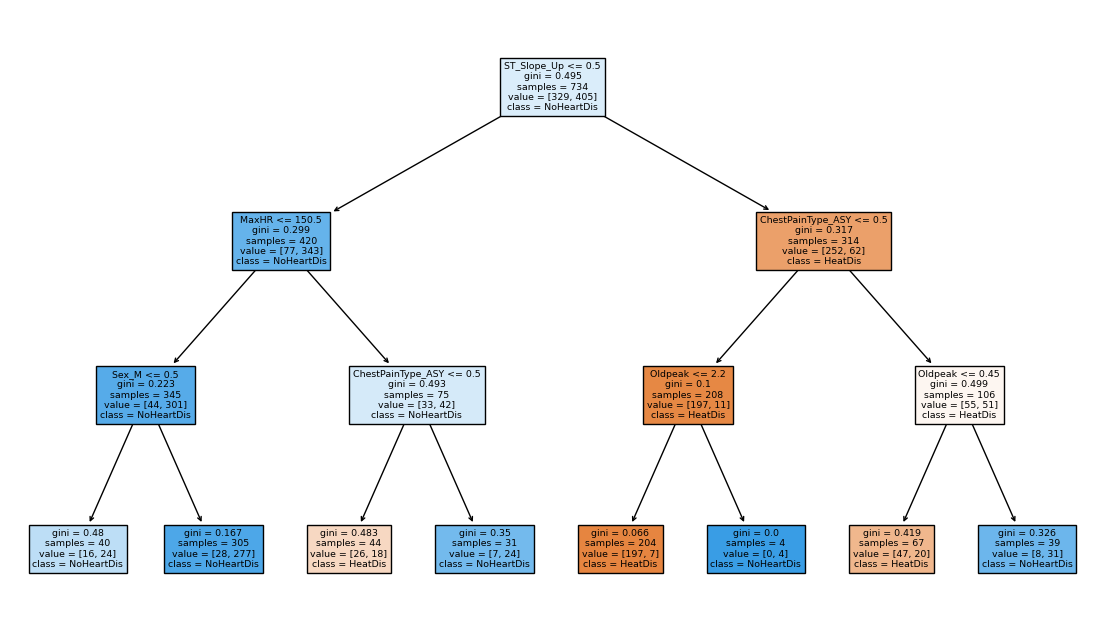

In [83]:
fig = plt.figure(figsize=(14, 8))
tree.plot_tree(decision_tree_model,
               feature_names = features,
               class_names=HD_levels,
               filled = True);
plt.show()
# fig.savefig('imagename.png')

## Random Forest

- All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
- One additional hyperparameter for Random Forest is called `n_estimators` which is the number of Decision Trees that make up the Random Forest. 

For a Random Forest, randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.

- Following the lectures, if $n$ is the number of features, we will randomly select $\sqrt{n}$ of these features to train each individual tree. 
- Modify this by setting the `max_features` parameter.

Speed up training jobs with another parameter, `n_jobs`. 

- Since the fitting of each tree is independent of each other, it is possible fit more than one tree in parallel. 
- So setting `n_jobs` higher will increase how many CPU cores it will use. 
 -- Note that the numbers very close to the maximum cores of your CPU may impact on the overall performance of your PC and even lead to freezes. 

We will run the same script again, but with another parameter, `n_estimators`, where we will choose between 10, 50, and 100. The default is 100.

In [52]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

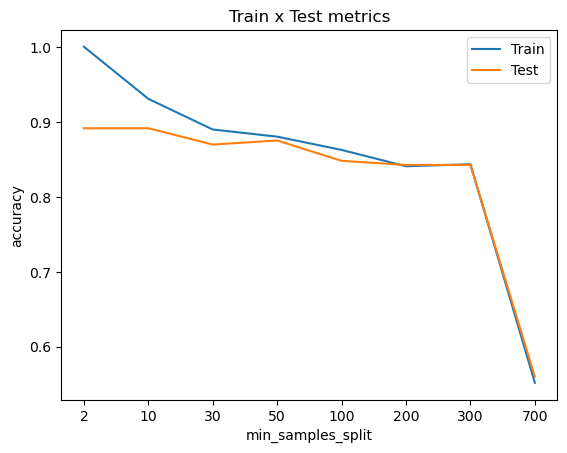

In [53]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

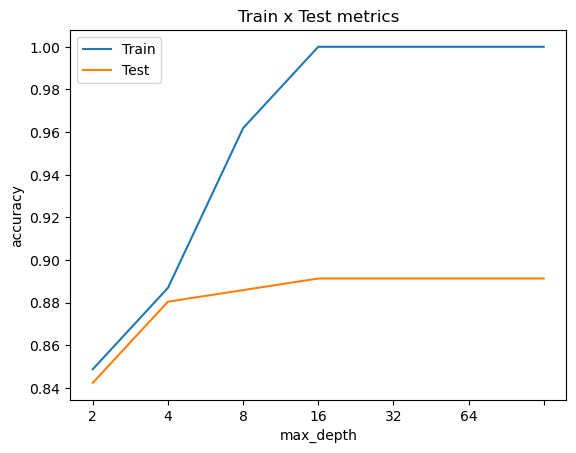

In [54]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

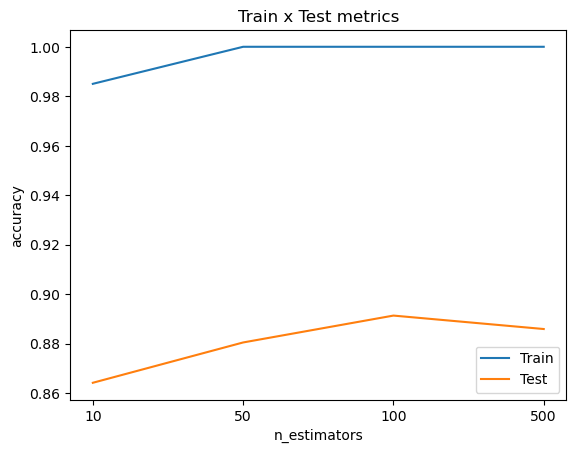

In [55]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_val = accuracy_score(predictions_val,y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Test'])

##### Insight:
These explorative figures suggest using the following parameters for fitting random forest

 - max_depth: 8
 - min_samples_split: 10
 - n_estimators: 100

In [61]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(X_train,y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}")
      
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9196
Metrics test:
	Accuracy score: 0.8804


- Ideally, we would want to check every combination of values for every hyperparameter that we are tuning.
- If we have 3 hyperparameters, and each hyperparameter has 4 values to try out, we should have a total of 4 x 4 x 4 = 64 combinations to try.
- When we only modify one hyperparameter while leaving the rest as their default value, we are trying 4 + 4 + 4 = 12 results. 
- To try out all combinations, we can use a sklearn implementation called GridSearchCV. GridSearchCV has a refit parameter that will automatically refit a model on the best combination so we will not need to program it explicitly. For more on GridSearchCV, please refer to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [93]:
eg_tree = random_forest_model.estimators_[0]

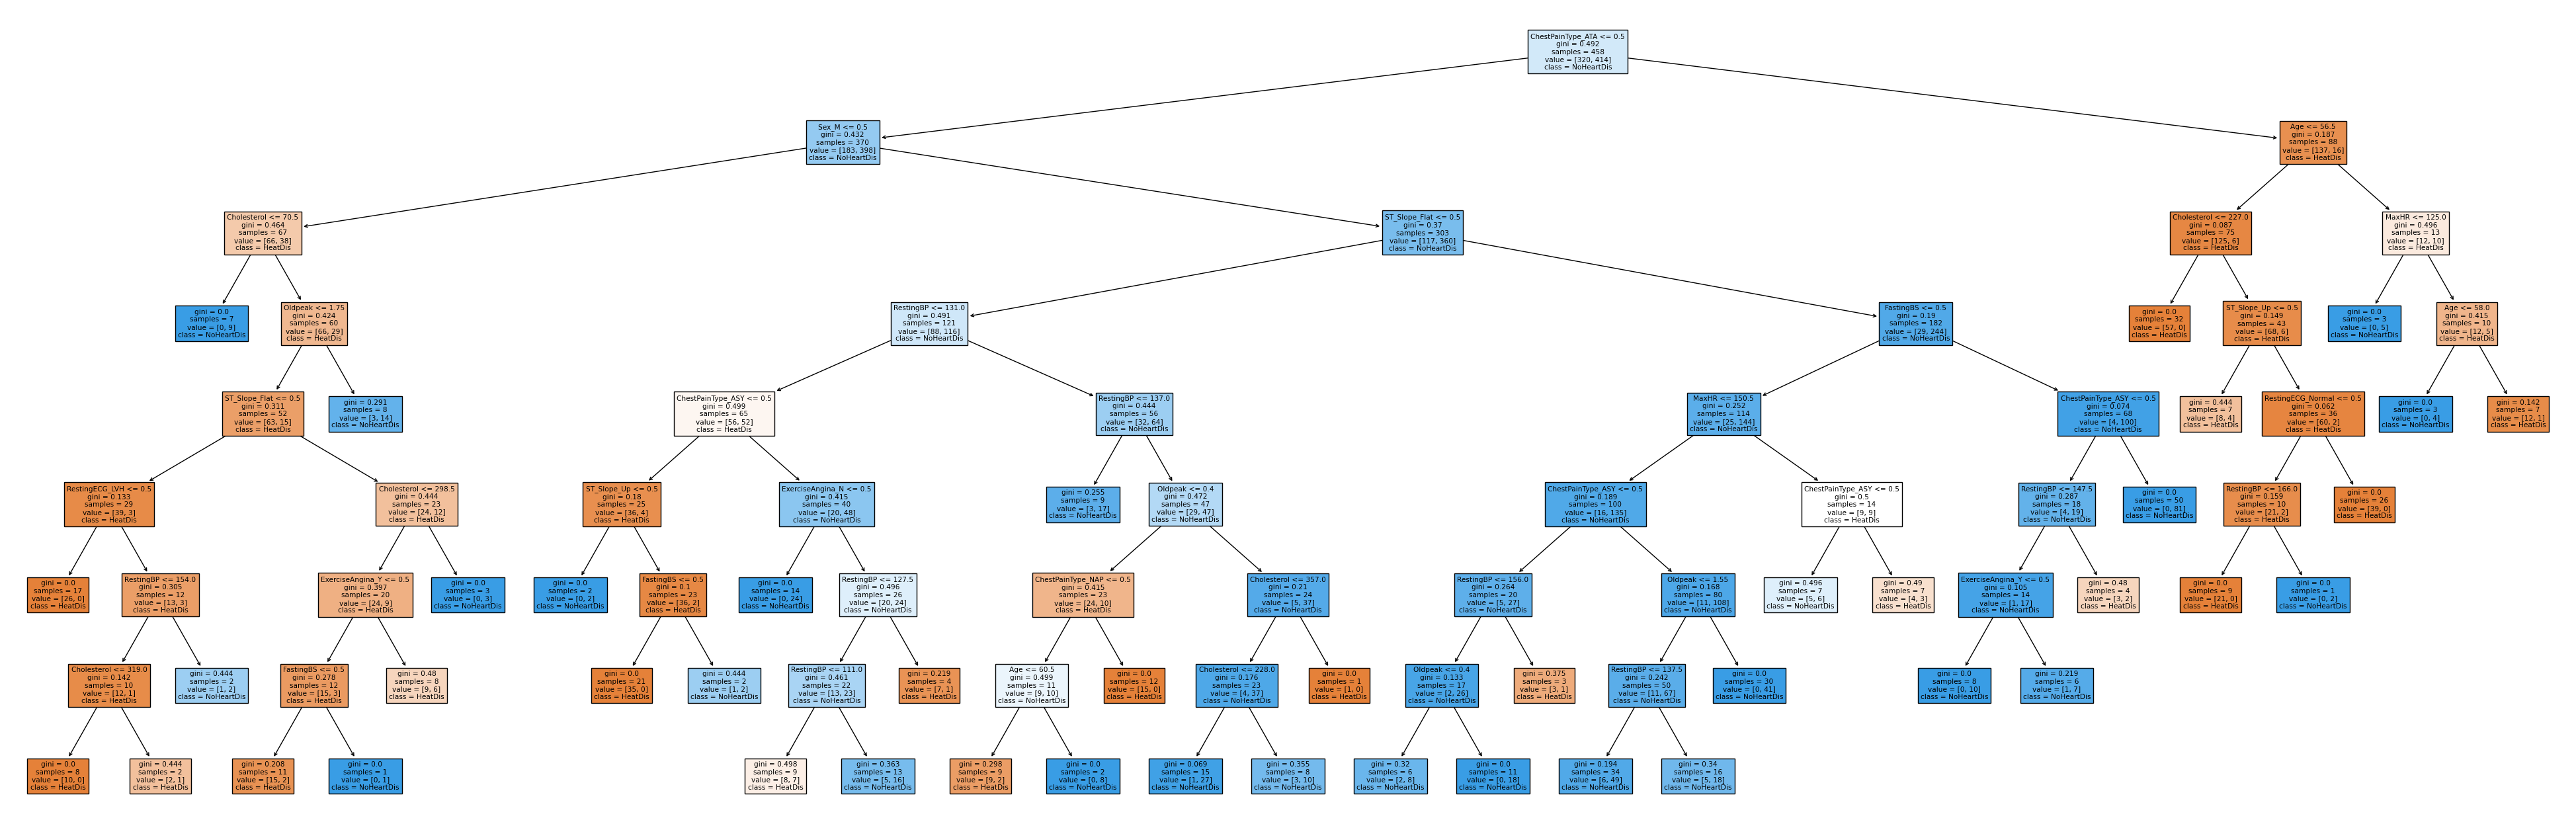

In [99]:
fig = plt.figure(figsize=(50, 16))
tree.plot_tree(eg_tree,
               feature_names = features,
               class_names=HD_levels,
               filled = True);
plt.show()

##### This is not a great visualization, since (1) it's too busy and (2) is just one example of the tree from the random forest

### Show the impact of each feature in prediction, over all trees in the random forest


#### Feature importance based on mean decrease in impurity

Impurity-based feature importances can be misleading for high cardinality features (many unique values). See Permutation feature importance as an alternative below.

In [113]:
# Feature importance based on mean decrease in impurity
importances = random_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_model.estimators_], axis=0)
print(importances)
print(std)


[0.04902474 0.0388102  0.0789427  0.01724044 0.06554221 0.08223372
 0.02260629 0.0220581  0.10093179 0.04120846 0.01405104 0.00508604
 0.00948694 0.00653102 0.00361512 0.06966272 0.05329509 0.00677495
 0.15799253 0.1549059 ]
[0.02694114 0.0219585  0.05439133 0.01913581 0.04692347 0.0709794
 0.02185429 0.02900904 0.1159133  0.07449384 0.0266961  0.006936
 0.00988174 0.0092751  0.00572279 0.10802612 0.08777415 0.0156156
 0.16209933 0.17508937]


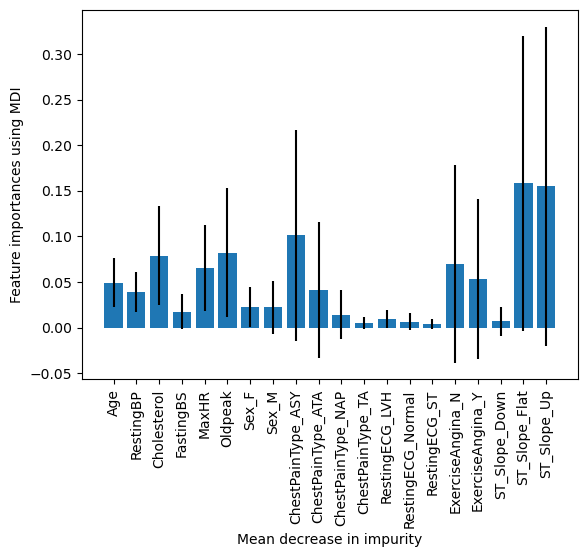

In [117]:
plt.bar(features, importances, yerr = std)
plt.xticks(rotation='vertical')
plt.ylabel("Feature importances using MDI")
plt.xlabel("Mean decrease in impurity")
plt.show()

#### Feature importance based on feature permutation

Permutation feature importance overcomes limitations of the impurity-based feature importance: 

they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [120]:
result = permutation_importance(
    random_forest_model, X_val, y_val, n_repeats=10, n_jobs=2
)

In [121]:
forest_importances = pd.Series(result.importances_mean, index=features)

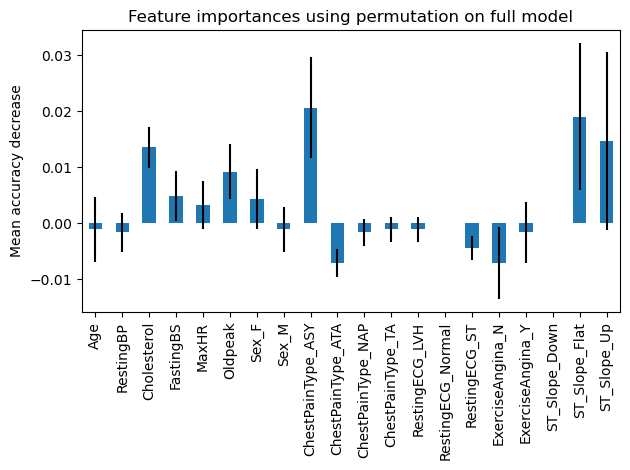

In [122]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## XGBoost

The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error. 

The model has the same parameters as a decision tree, plus the learning rate.
- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.

One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.
- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop. 
- More iterations lead to more estimators, and more estimators can result in overfitting.  
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.


In [145]:
# Use 80% to train and 20% to eval
n = int(len(X_train)*0.8) 

In [146]:
# separate into training and evaluation set
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

/var/folders/9s/234vjdhj00xdn8lk3ycnlvy80000gn/T/ipykernel_15232/2684262237.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]


In [151]:
# the model keeps track of the round with the best performance (lowest evaluation metric).
# Each successive round's evaluation metric is compared to the best metric. 
# If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
# early_stopping_rounds: stop the model training if its evaluation metric is no longer improving on the validation set. set to 10 here
# The model is returned at its last state when training terminated, not its state during the best round. 

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                          colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                          early_stopping_rounds=None, enable_categorical=False,
                          eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                          n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = RANDOM_STATE)


In [180]:
# pass in evaluation set: eval_set = [(X_train_eval,y_train_eval)

xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_fit, y_train_fit), (X_train_eval,y_train_eval)], early_stopping_rounds = 10)

[0]	validation_0-logloss:0.62889	validation_1-logloss:0.64479
[1]	validation_0-logloss:0.57593	validation_1-logloss:0.60569
[2]	validation_0-logloss:0.53080	validation_1-logloss:0.57481
[3]	validation_0-logloss:0.49268	validation_1-logloss:0.54947
[4]	validation_0-logloss:0.45877	validation_1-logloss:0.52973
[5]	validation_0-logloss:0.42912	validation_1-logloss:0.51331
[6]	validation_0-logloss:0.40307	validation_1-logloss:0.49823
[7]	validation_0-logloss:0.38003	validation_1-logloss:0.48855
[8]	validation_0-logloss:0.35799	validation_1-logloss:0.47888
[9]	validation_0-logloss:0.33888	validation_1-logloss:0.47068
[10]	validation_0-logloss:0.32145	validation_1-logloss:0.46507
[11]	validation_0-logloss:0.30545	validation_1-logloss:0.45832
[12]	validation_0-logloss:0.29143	validation_1-logloss:0.45557
[13]	validation_0-logloss:0.27720	validation_1-logloss:0.45030
[14]	validation_0-logloss:0.26452	validation_1-logloss:0.44653
[15]	validation_0-logloss:0.25290	validation_1-logloss:0.44213
[1

/Users/mayazwang/opt/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=55, ...)

In [181]:
# the model allows up to 500 estimators; the algorithm only fit 26 estimators (over 26 rounds of training)
# The best round of training was round 16, with a log loss of 4.3948.
xgb_model.best_iteration

16

In [155]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")


Metrics train:
	Accuracy score: 0.9251
Metrics test:
	Accuracy score: 0.8641


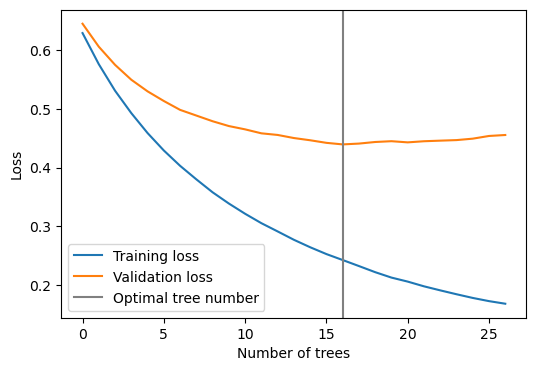

In [188]:
results = xgb_model.evals_result()

plt.figure(figsize=(6,4))
plt.plot(results["validation_0"]["logloss"], label="Training loss")
plt.plot(results["validation_1"]["logloss"], label="Validation loss")
plt.axvline(xgb_model.best_iteration, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# conda install python-graphviz

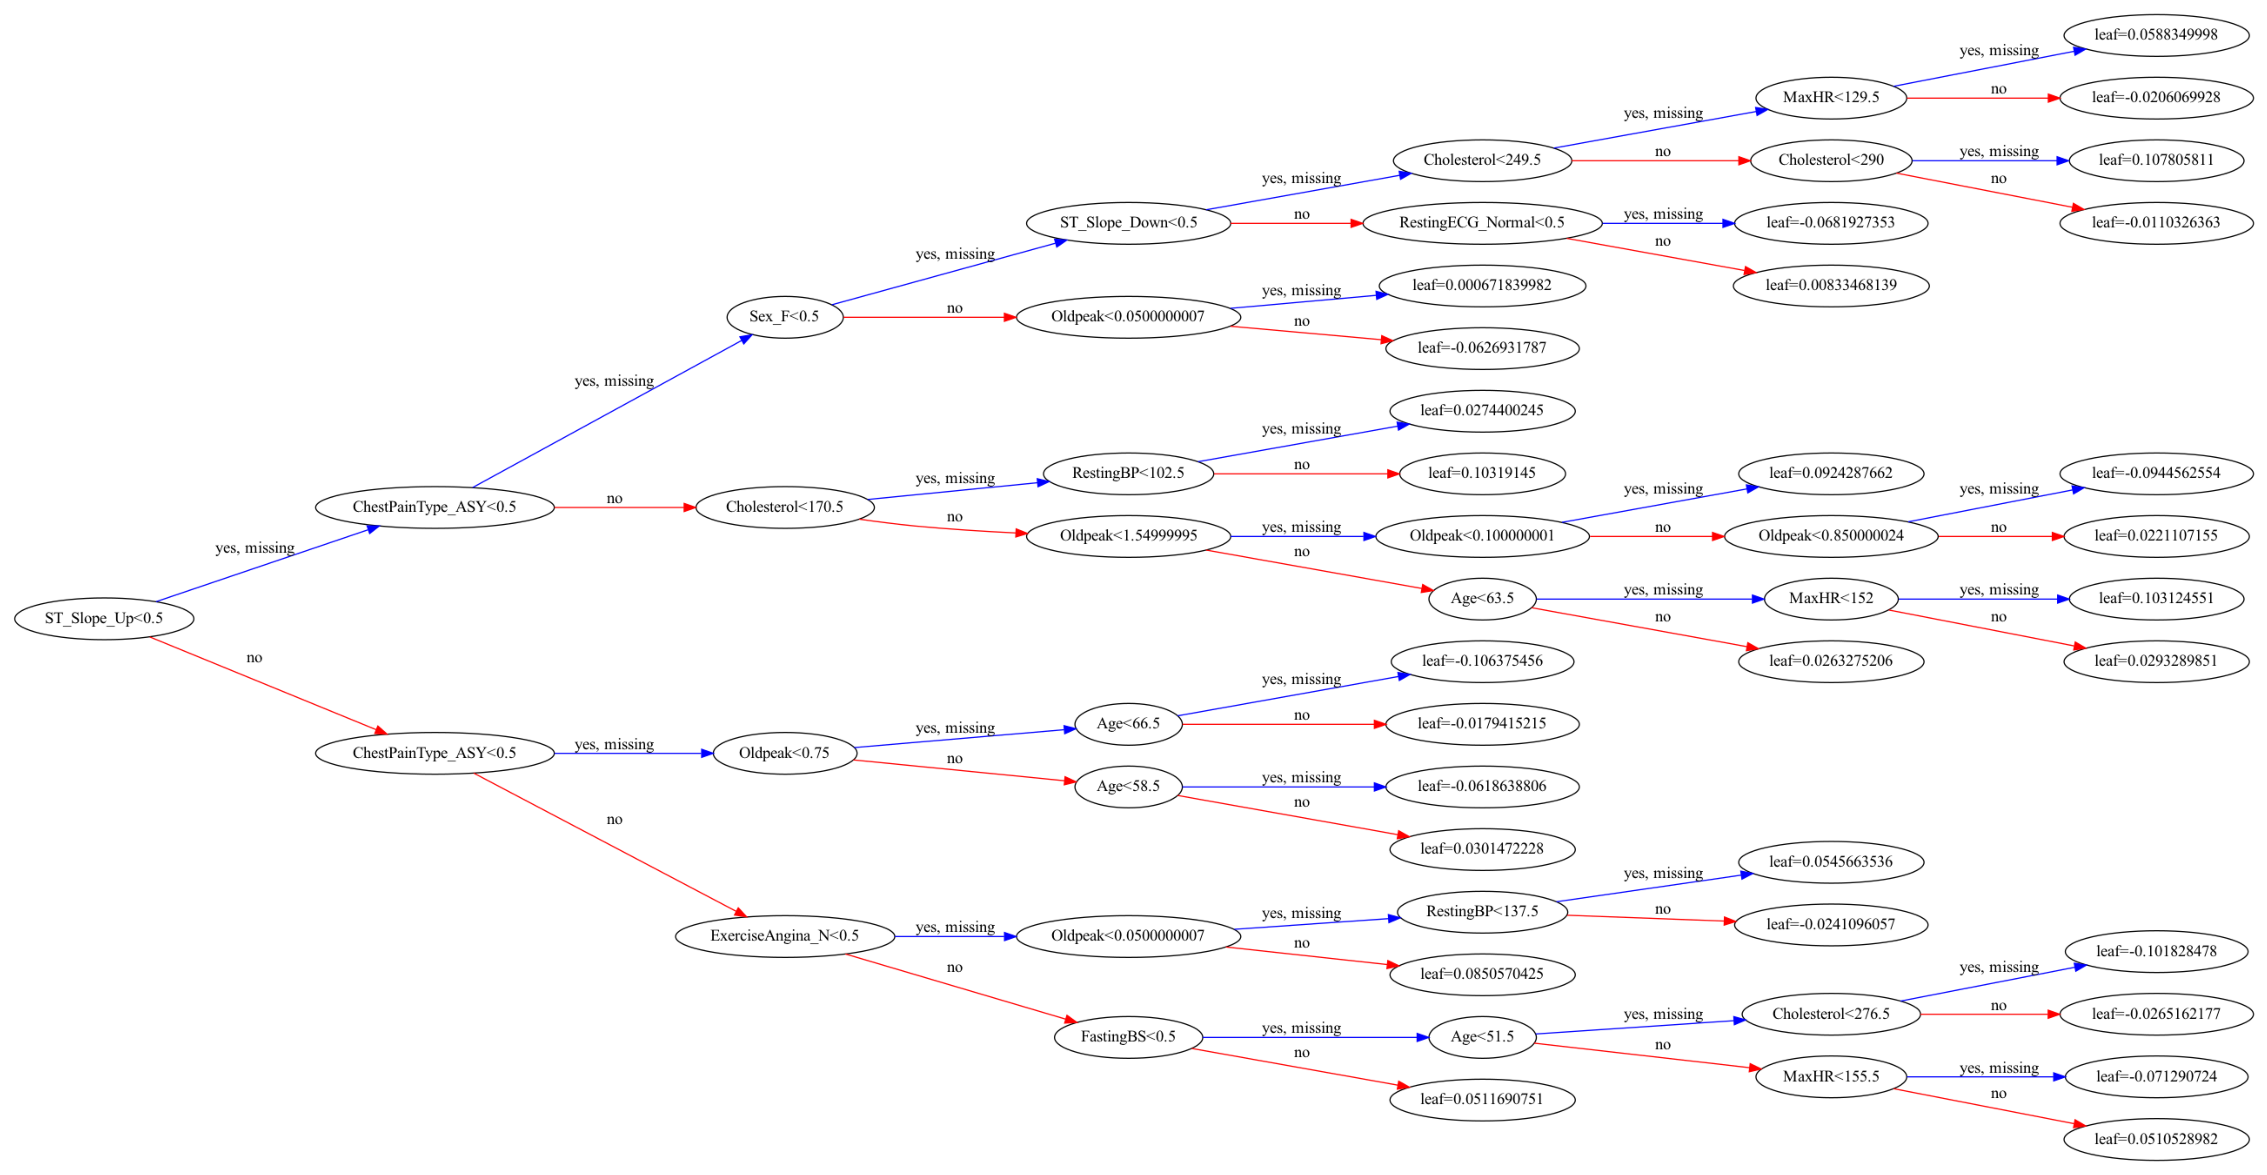

In [189]:
fig, ax = plt.subplots(figsize=(30, 15))
plot_tree(xgb_model, num_trees=16, ax=ax, rankdir='LR')
plt.show()
# plt.savefig("temp.pdf")

In [178]:
xgb_model.feature_importances_

array([0.01177058, 0.01495656, 0.01314396, 0.02651228, 0.01905394,
       0.02121396, 0.03232622, 0.        , 0.08158525, 0.        ,
       0.01942579, 0.00241539, 0.02043742, 0.00712879, 0.        ,
       0.03965041, 0.        , 0.00890351, 0.05072677, 0.63074917],
      dtype=float32)

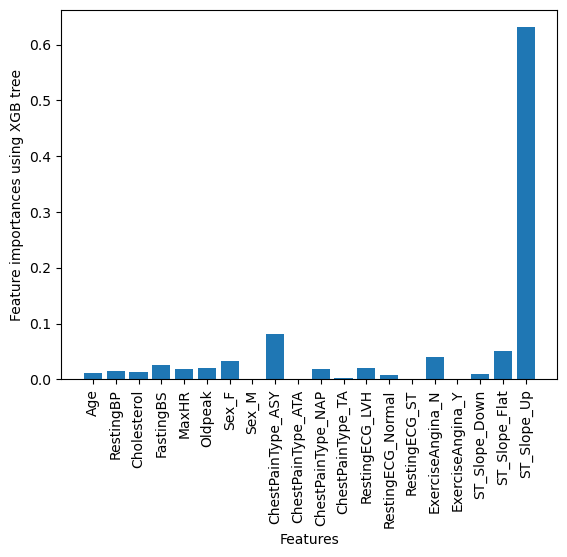

In [179]:
xgb_importance = xgb_model.feature_importances_
plt.bar(features, xgb_importance)
plt.xticks(rotation='vertical')
plt.ylabel("Feature importances using XGB tree")
plt.xlabel("Features")
plt.show()


## Conclusion

- It looks like across all three Tree models, ST_Slope_Up & ChestPainType_ASY are the most influential predictors
- Both Random Forest and XGB Tree have high predictive accuracy